# Sentiment Analysis of Women's E-Commerce Clothing Reviews using Deep Learning Models 
    This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

## 1) Import and Cleaning Data

In [ ]:
!jt -t solarizedl

#### Import Librairies

In [116]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
import re
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D,LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

#### Import Data

In [4]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

#### Head

In [5]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [6]:
df["Recommended IND"] = df["Recommended IND"].replace({0:"No",1:"Yes"})

#### Deleting useless column

In [7]:
del df["Unnamed: 0"]

#### Missing Value

In [8]:
df.drop(df[pd.isnull(df['Review Text'])].index , inplace=True)
df.drop(df[pd.isnull(df['Division Name'])].index , inplace=True)
df.drop(df[pd.isnull(df['Department Name'])].index , inplace=True)
df.drop(df[pd.isnull(df['Class Name'])].index , inplace=True)
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

    We start with a small analysis of the dataset to see if we can fill the missing value based on other columns or simply delete them

In [9]:
df["Review Text"] = [str(x) for x in df["Review Text"]]

## 2)Data Analysis

##### How many piece are reviewed in this dataset

In [10]:
len(df["Clothing ID"].value_counts())

1172

##### The frequency of the rating

<AxesSubplot:ylabel='Rating'>

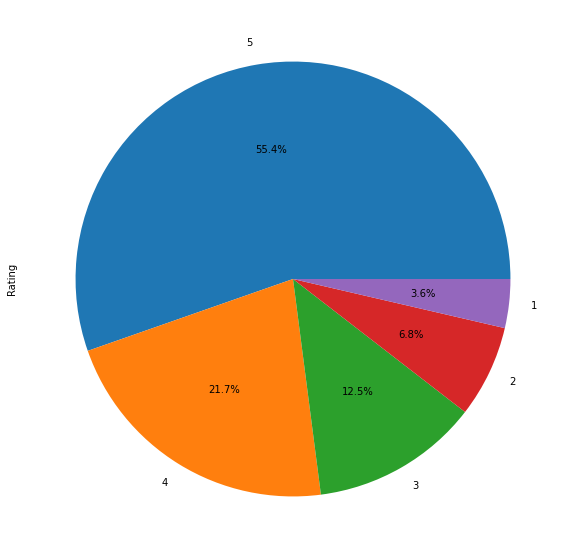

In [11]:
df["Rating"].value_counts().plot(kind = "pie", autopct='%1.1f%%',figsize=(16, 10))


We can easily conclude that more thant 75% of the products are reviewed as good 

In [12]:
df["Positive Feedback Count"].value_counts()

0      10321
1       4041
2       2193
3       1433
4        922
       ...  
89         1
117        1
54         1
56         1
95         1
Name: Positive Feedback Count, Length: 82, dtype: int64

<AxesSubplot:>

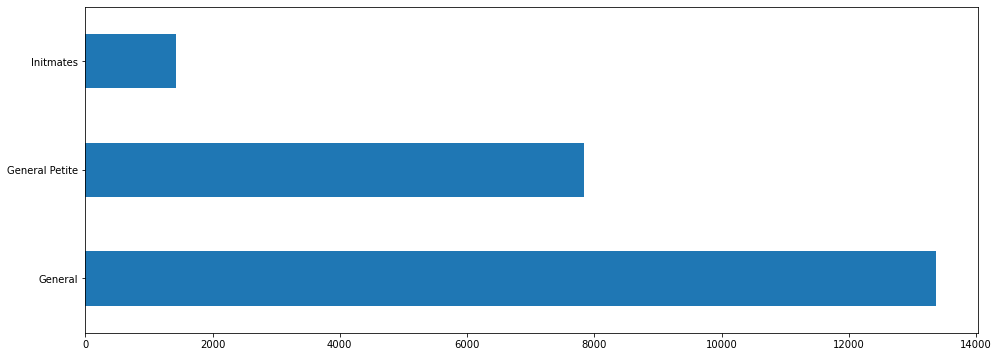

In [14]:
plt.figure(figsize=(16,6))
df['Division Name'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

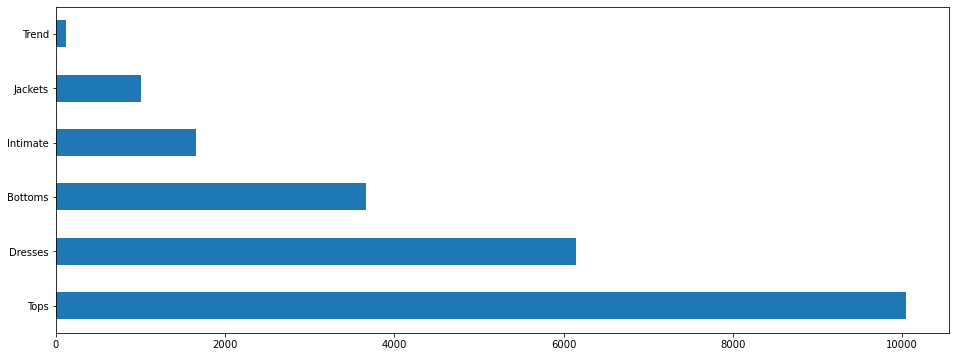

In [15]:
plt.figure(figsize=(16,6))
df['Department Name'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

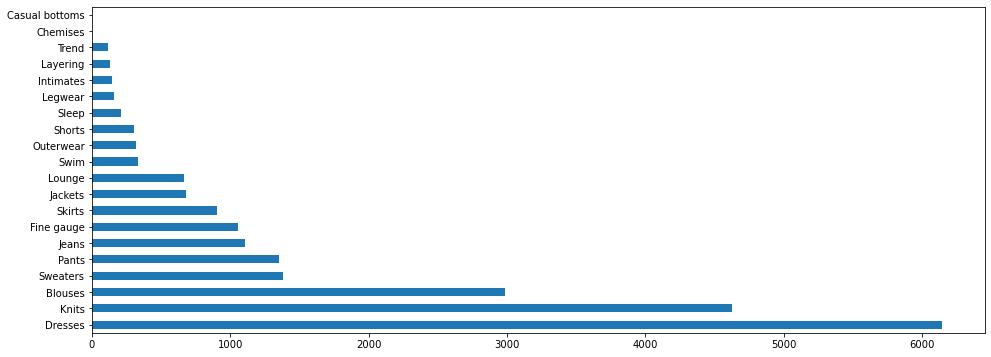

In [16]:
plt.figure(figsize=(16,6))
df['Class Name'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:ylabel='Density'>

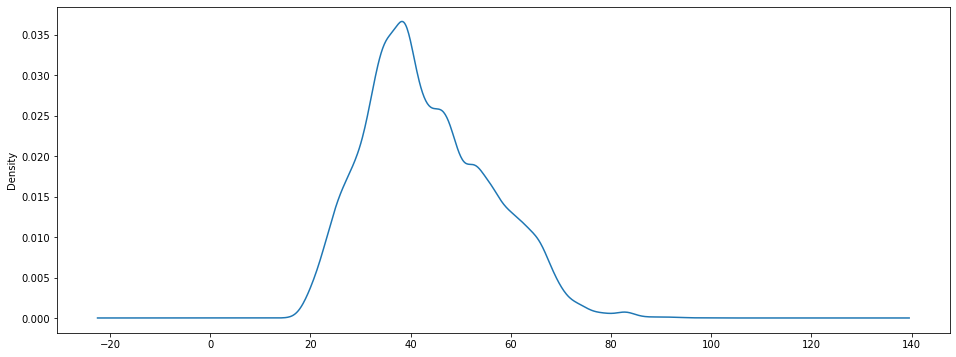

In [17]:
plt.figure(figsize=(16,6))
df.Age.plot(kind='kde')

##### Create the new feature "Age_category"

In [18]:
df["Age_category"] =  pd.cut(df.Age,bins=[20,55,100],labels=['Adult','Elderly'])


<AxesSubplot:>

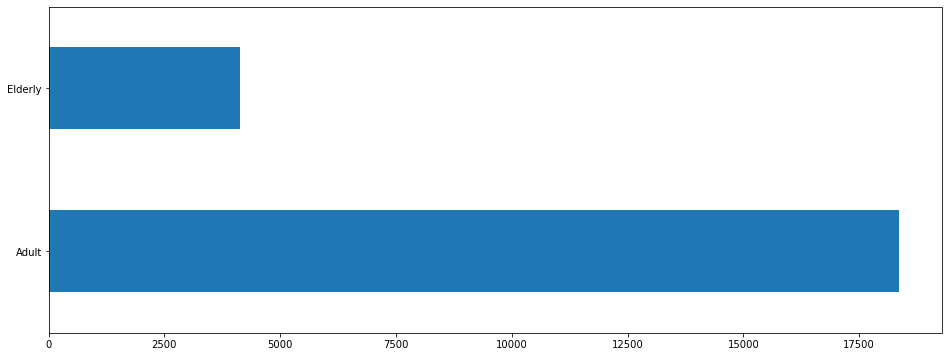

In [19]:
plt.figure(figsize=(16,6))
df["Age_category"].value_counts().plot(kind="barh")

<AxesSubplot:xlabel='Rating', ylabel='count'>

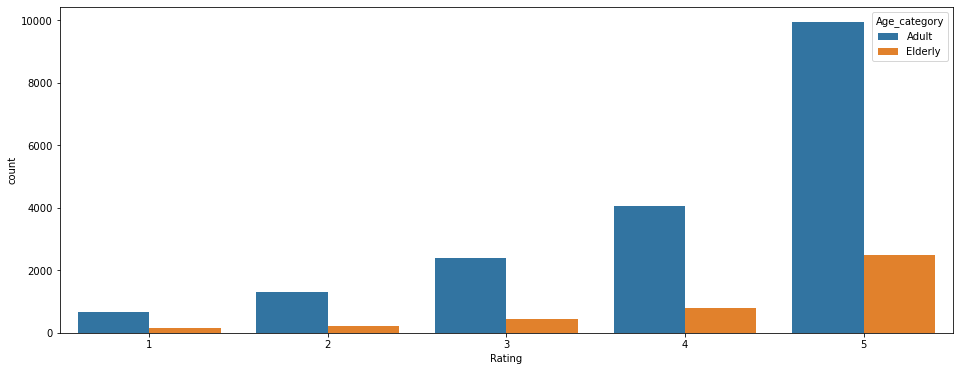

In [20]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Rating",hue="Age_category",data = df)

<AxesSubplot:xlabel='Rating', ylabel='count'>

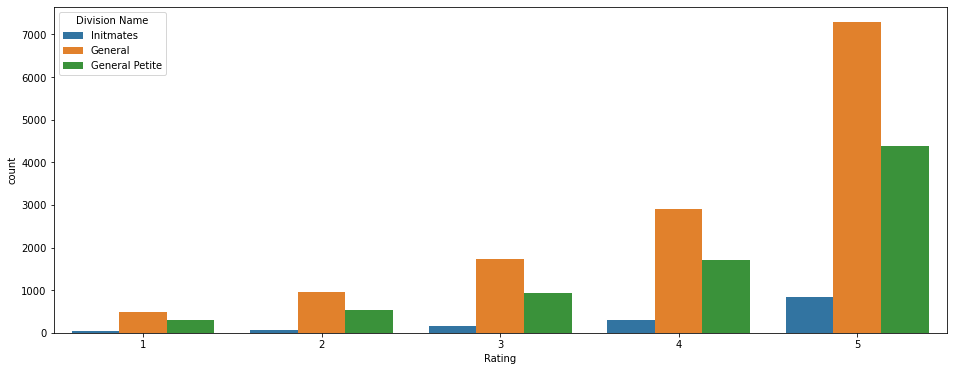

In [22]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Rating",hue="Division Name",data = df)

<AxesSubplot:xlabel='Rating', ylabel='count'>

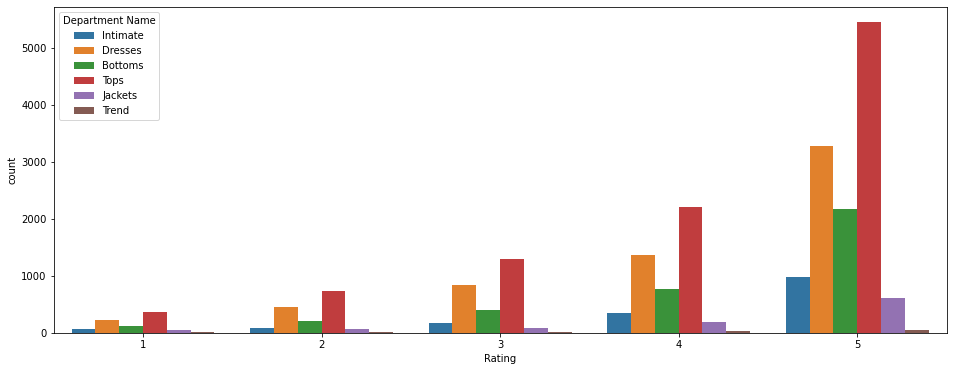

In [23]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Rating",hue="Department Name",data = df)

<AxesSubplot:xlabel='Rating', ylabel='count'>

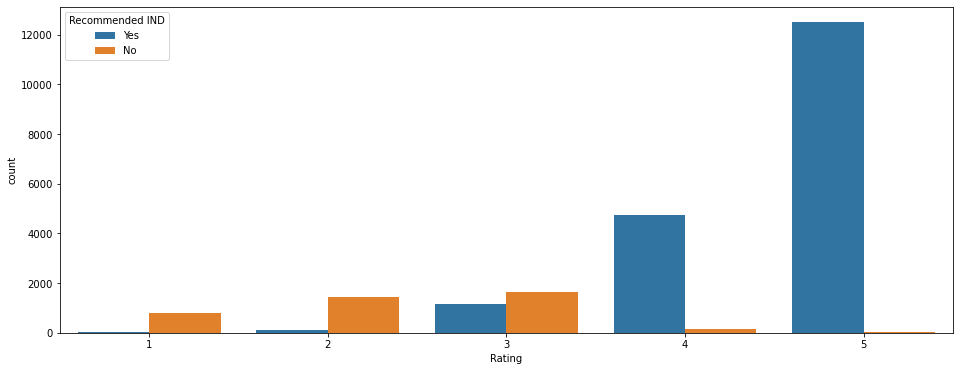

In [24]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Rating",hue="Recommended IND",data = df)

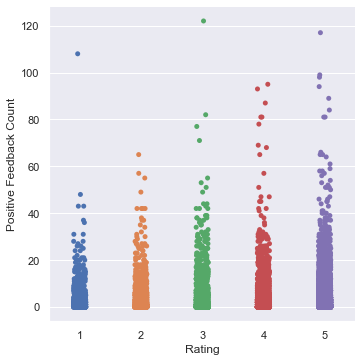

In [25]:
sns.set(rc={'figure.figsize':(16,8.27)})
sns.catplot(x="Rating", y="Positive Feedback Count", data=df)

## 3) Feature Engineering

### Labelling Text data 

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

In [27]:
t = []
for x in df["Review Text"]:
    dt = vds.polarity_scores(x)
    if dt["compound"]>=0.05:
        t.append("pos")
    elif dt["compound"]<0.05 and dt["compound"]>-0.05:
        t.append("neu")
    elif dt["compound"]<=-0.05:
        t.append("neg")

In [28]:
df["sentiment"] = t

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

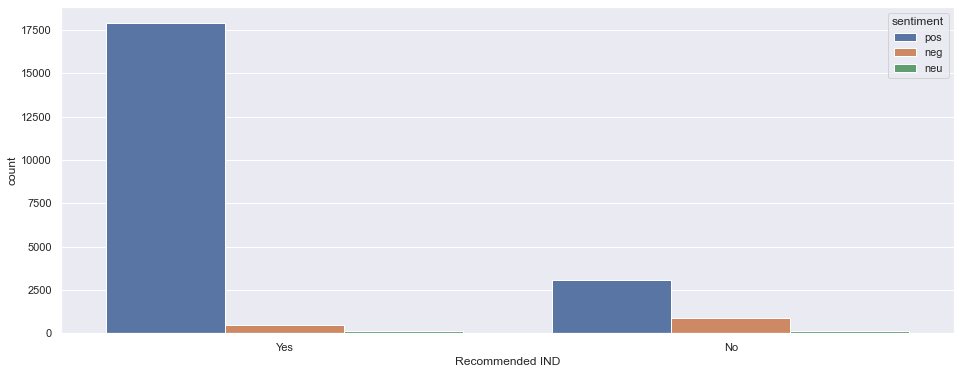

In [29]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Recommended IND",hue="sentiment",data = df)

<AxesSubplot:xlabel='Rating', ylabel='count'>

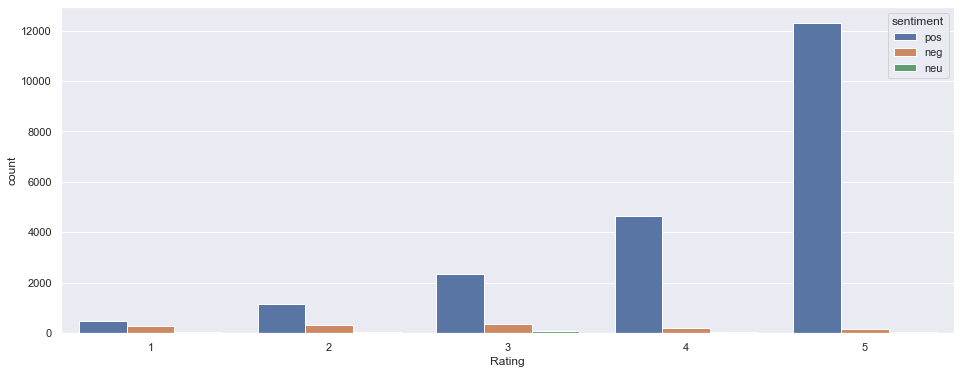

In [30]:
plt.figure(figsize=(16, 6))
sns.countplot(x = "Rating",hue="sentiment",data = df)

        -We can from this graphs that the rating variable has no direct impact on the sentiment variable, even if rating = 1 sentiment(pos) is still > sentiment(neg), so we can train our model based on only the text Data. 

### Steaming Text

In [31]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
print(clean_text(df["Review Text"][1]))

['love', 'dress', 'sooo', 'pretti', 'happen', 'find', 'store', 'im', 'glad', 'bc', 'never', 'would', 'order', 'onlin', 'bc', 'petit', 'bought', 'petit', '58', 'love', 'length', 'hit', 'littl', 'knee', 'would', 'definit', 'true', 'midi', 'someon', 'truli', 'petit']


In [32]:
df["sentiment"].value_counts()

pos    20975
neg     1375
neu      278
Name: sentiment, dtype: int64

In [33]:
df.drop(df[df['sentiment'] == "neu"].index, inplace = True) 

In [34]:
df["sentiment"].value_counts()

pos    20975
neg     1375
Name: sentiment, dtype: int64

In [35]:
df["sentiment"] = np.array(list(map(lambda x: 1 if x=="pos" else 0, df["sentiment"])))

### Preparing the Embedding Layer

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df["Review Text"], df["sentiment"], test_size=0.20, random_state=1)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

 ### Padding

In [64]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

### Create feature matrix

    We will use GloVe embeddings to create our feature matrix. In the following script we load the GloVe word embeddings and create a dictionary that will contain words as keys and their corresponding embedding list as values.

In [69]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

    we will create an embedding matrix where each row number will correspond to the index of the word in the corpus. The matrix will have 100 columns where each column will contain the GloVe word embeddings for the words in our corpus

In [70]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [76]:
maxlen

100

## 4) Model Conception

### Simple Neural Network

In [72]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

##### Compiling the model

In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1344600   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 1,354,601
Trainable params: 10,001
Non-trainable params: 1,344,600
_________________________________________________________________
None


##### Training the model

In [95]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 0s 4ms/step - loss: 0.0360 - acc: 0.9922 - val_loss: 0.2994 - val_acc: 0.9265
Epoch 2/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0345 - acc: 0.9928 - val_loss: 0.3037 - val_acc: 0.9259
Epoch 3/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0330 - acc: 0.9934 - val_loss: 0.3073 - val_acc: 0.9228
Epoch 4/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0325 - acc: 0.9941 - val_loss: 0.3111 - val_acc: 0.9239
Epoch 5/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0306 - acc: 0.9946 - val_loss: 0.3161 - val_acc: 0.9270
Epoch 6/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0291 - acc: 0.9950 - val_loss: 0.3230 - val_acc: 0.9281
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.0277 - acc: 0.9955 - val_loss: 0.3264 - val_acc: 0.9279
Epoch 8/10
112/112 [==============================] - 0s 3ms/step - loss: 0.

##### Evaluating performance

In [96]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

140/140 [==============================] - 0s 1ms/step - loss: 0.3326 - acc: 0.9248
Test Score: 0.3325601816177368
Test Accuracy: 0.9248322248458862


##### Model accuracy

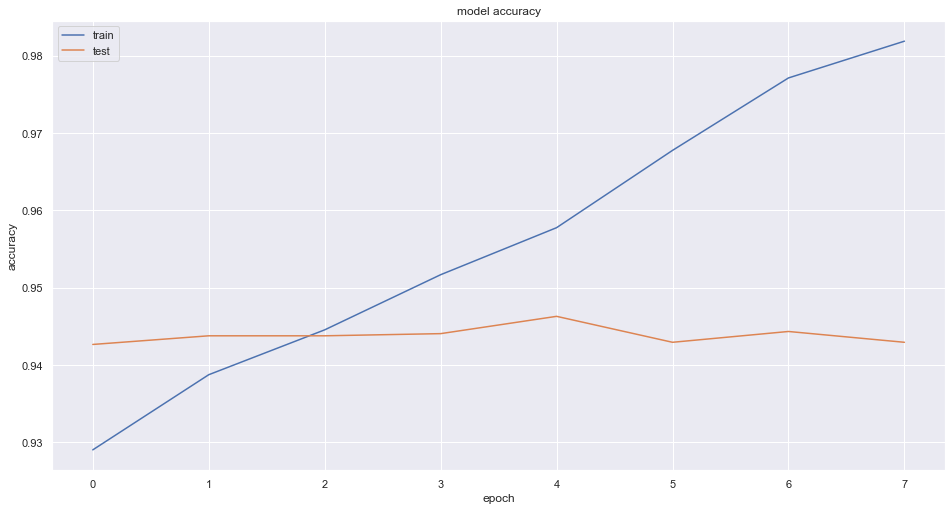

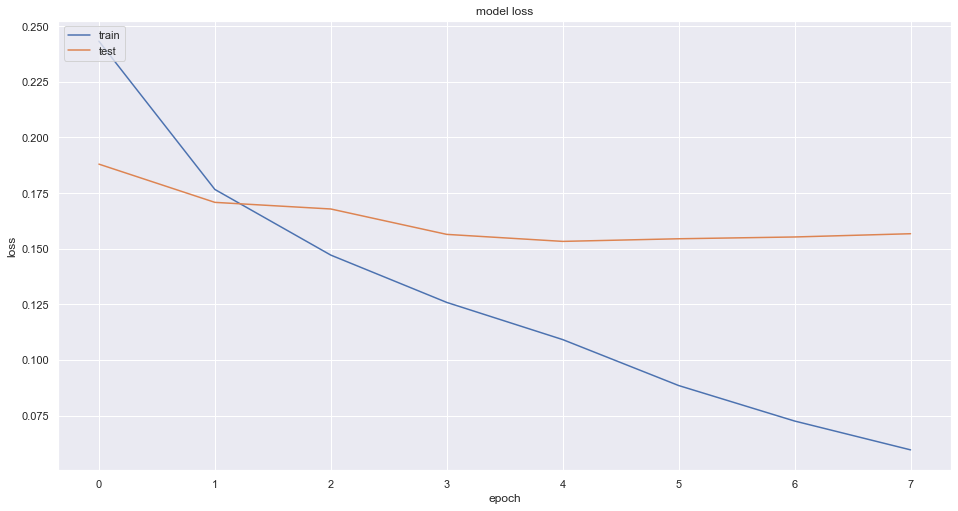

In [143]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Convolutional Neural Network

In [133]:
model2 = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model2.add(embedding_layer)

model2.add(Conv1D(128, 5, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(1, activation='sigmoid'))

##### Compiling the model

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

##### Summary

In [134]:
print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1344600   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,408,857
Trainable params: 64,257
Non-trainable params: 1,344,600
_________________________________________________________________
None


##### Training the model

In [135]:
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=8, verbose=1, validation_split=0.2)

score2 = model2.evaluate(X_test, y_test, verbose=1)

Epoch 1/8
112/112 [==============================] - 3s 26ms/step - loss: 0.2286 - acc: 0.9360 - val_loss: 0.1905 - val_acc: 0.9432
Epoch 2/8
112/112 [==============================] - 3s 25ms/step - loss: 0.1689 - acc: 0.9387 - val_loss: 0.1677 - val_acc: 0.9427
Epoch 3/8
112/112 [==============================] - 3s 25ms/step - loss: 0.1334 - acc: 0.9499 - val_loss: 0.1544 - val_acc: 0.9449
Epoch 4/8
112/112 [==============================] - 3s 24ms/step - loss: 0.1120 - acc: 0.9566 - val_loss: 0.1510 - val_acc: 0.9474
Epoch 5/8
112/112 [==============================] - 3s 25ms/step - loss: 0.0920 - acc: 0.9666 - val_loss: 0.1691 - val_acc: 0.9346
Epoch 6/8
112/112 [==============================] - 3s 24ms/step - loss: 0.0754 - acc: 0.9774 - val_loss: 0.1497 - val_acc: 0.9452
Epoch 7/8
112/112 [==============================] - 3s 26ms/step - loss: 0.0568 - acc: 0.9845 - val_loss: 0.1889 - val_acc: 0.9460
Epoch 8/8
140/140 [==============================] - 0s 3ms/step - loss: 0.1

##### Evaluating performance

In [136]:
print("Test Score:", score2[0])
print("Test Accuracy:", score2[1])

Test Score: 0.17650559544563293
Test Accuracy: 0.9429529905319214


##### Visualization 

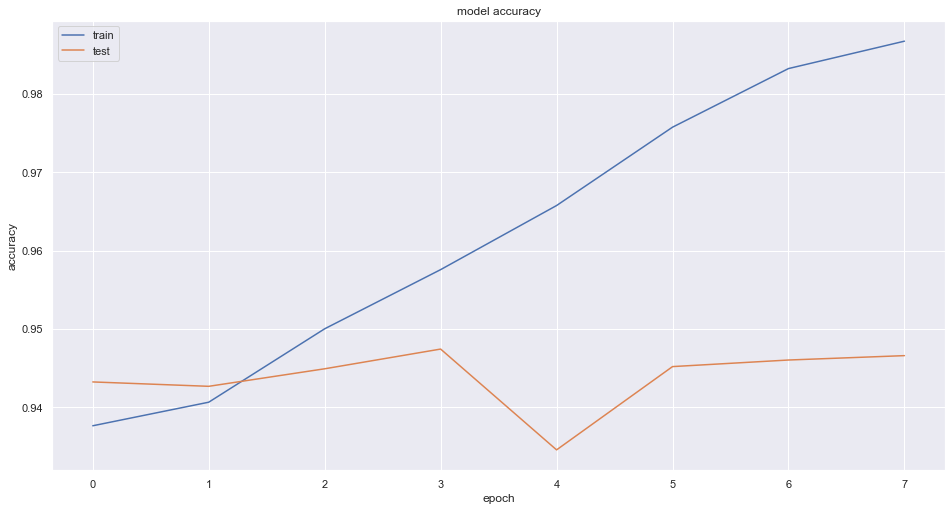

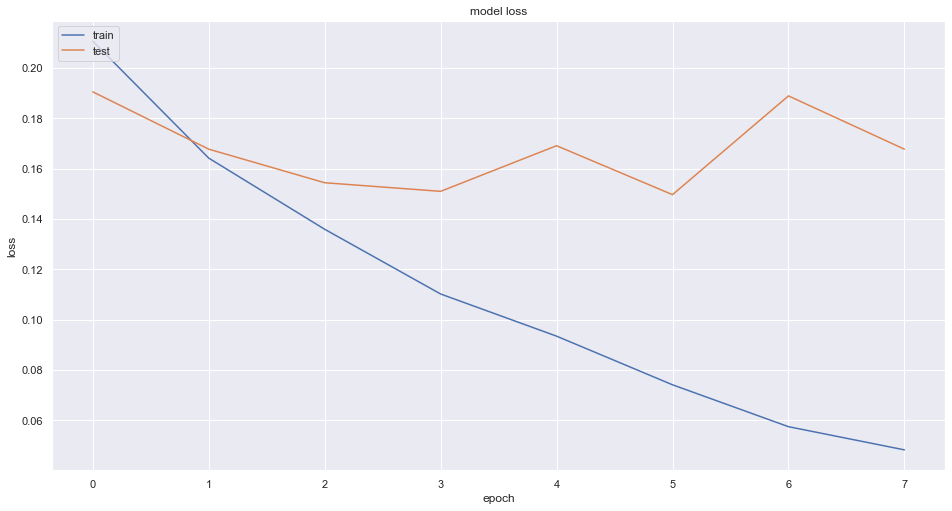

In [137]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

###  Recurrent Neural Network (LSTM)

In [138]:
model3 = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model3.add(embedding_layer)
model3.add(LSTM(128))

model3.add(Dense(1, activation='sigmoid'))

##### Compiling the model

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

##### Summary

In [139]:
print(model3.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1344600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,461,977
Trainable params: 117,377
Non-trainable params: 1,344,600
_________________________________________________________________
None


##### Training the model

In [140]:
history3 = model3.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

score3 = model3.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
112/112 [==============================] - 14s 108ms/step - loss: 0.3421 - acc: 0.8956 - val_loss: 0.2190 - val_acc: 0.9430
Epoch 2/20
112/112 [==============================] - 11s 99ms/step - loss: 0.2330 - acc: 0.9378 - val_loss: 0.2191 - val_acc: 0.9430
Epoch 3/20
112/112 [==============================] - 11s 99ms/step - loss: 0.2349 - acc: 0.9371 - val_loss: 0.2205 - val_acc: 0.9430
Epoch 4/20
112/112 [==============================] - 12s 105ms/step - loss: 0.2353 - acc: 0.9372 - val_loss: 0.2220 - val_acc: 0.9430
Epoch 5/20
112/112 [==============================] - 13s 112ms/step - loss: 0.2355 - acc: 0.9368 - val_loss: 0.2188 - val_acc: 0.9430
Epoch 6/20
112/112 [==============================] - 14s 127ms/step - loss: 0.2354 - acc: 0.9363 - val_loss: 0.2190 - val_acc: 0.9430
Epoch 7/20
112/112 [==============================] - 14s 122ms/step - loss: 0.2227 - acc: 0.9410 - val_loss: 0.2190 - val_acc: 0.9430
Epoch 8/20
112/112 [==============================] - 13s

##### Evaluating model

In [141]:
print("Test Score:", score3[0])
print("Test Accuracy:", score3[1])

Test Score: 0.15234467387199402
Test Accuracy: 0.9438478946685791


##### Visualization

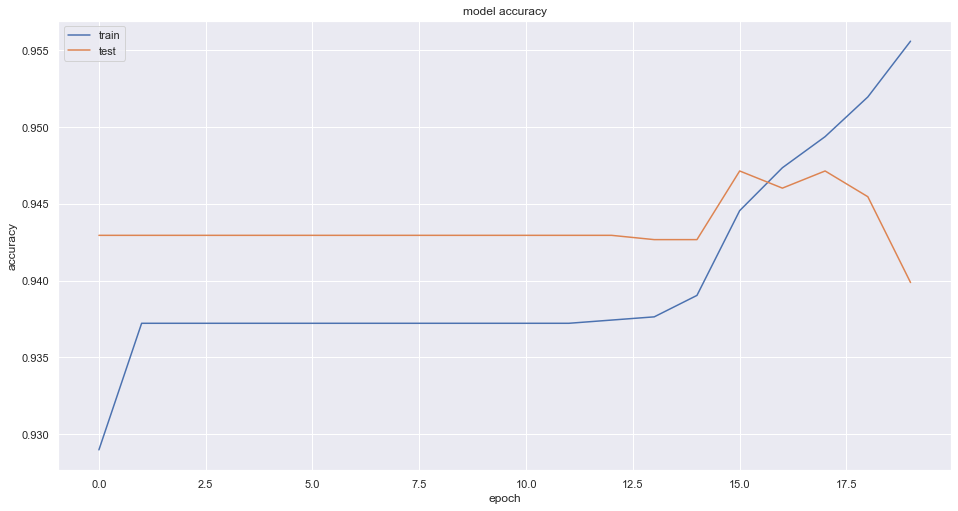

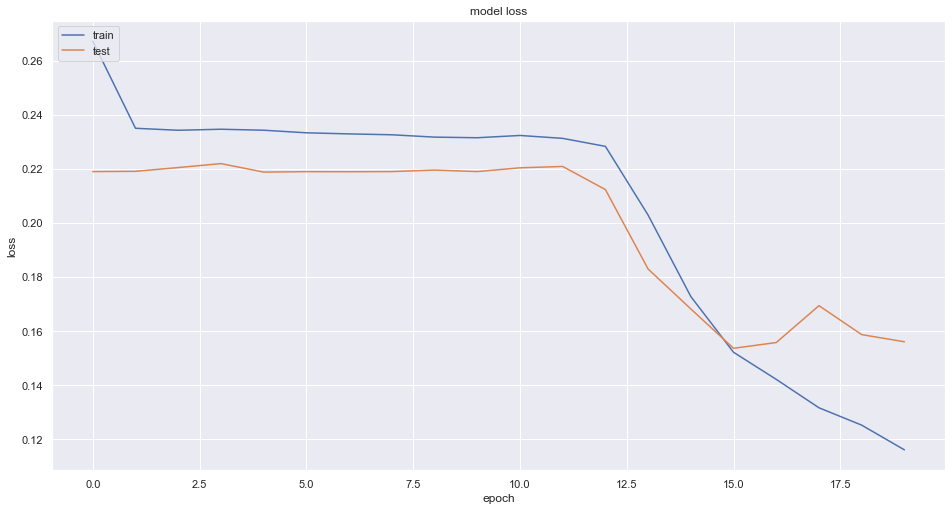

In [142]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Making Prediction

In [177]:
instance = df["Review Text"][5]
print(instance)

I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.


In [178]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

In [179]:
flat_list = [flat_list]
instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

##### Simple neural network

In [180]:
model.predict(instance)

array([[0.9829277]], dtype=float32)

##### Convolutional Neural Network

In [181]:
model2.predict(instance)

array([[0.9990529]], dtype=float32)

##### Recurrent Neural Network (LSTM)

In [182]:
model3.predict(instance)

array([[0.9905863]], dtype=float32)

## Conclusion

After some data processing and analysis that consists of the elimination the missing values, remove the unnecessary variables and transformation of the categorical variables.  
Then I proceeded to a data analysis and some feature engineering in order to better visualize the data to get out the variables necessary for the design of our Deep Learning model.  
The purpose of these models is to analyze the customer’s reviews and infer whether it is positive or not, in order to do that I went through a textual data processing which has the objective to take the most used words in the dataset and transform it into an input matrix that can be used in deep learning models since computer cannot understand words.  
After some visualization of the results, we can totally see that the 3 models overfit very quickly on the training set except for the RNN model which make him the best solution for working with text Data.  
Sentiment analysis plays a pivotal role in market research and similar fields. Indeed, keeping track of customers’ satisfaction and, most importantly, isolate those drivers which determine their sentiment towards items, could lead to winning marketing campaigns and selling strategies.